In [1]:
import os, json
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def load_data(string, list_dir = '../DanielCorley/user-site-export'):
    
    '''
    pass in the first three letters of the file you're trying to load:
        ['ste', 'dis', 'hea', 'ste', 'est']
    '''
    file_dict = {
        'ste': 'step_df',
        'dis': 'dist_df',
        'hea': 'heart_df',
        'sle': 'sleep_df',
        'est': 'oxy_df'
    }
    if string not in file_dict:
        raise Exception('string not recognized!')
    
    try:
        df = pd.read_pickle(file_dict[string])
        print('loading from pickle')
        return df
    except IOError:
        print('loading from file storage')
        files = [x for x in os.listdir(list_dir) if x[:3] == string]
        print(f'example file name: {files[0]}')
        print(f'number of files: {len(files)}')
        
        file_type = None
        try:
            pd.read_json(f'{list_dir}/{files[0]}')
            file_type = 'json'
            print('loading json')
        except:
            file_type = 'csv'
            print('loading csv')
            
        # iterate over the files and append to one dataframe
        df = pd.DataFrame()
        for i,file in enumerate(files, 1):
            print(i, end=', ' if file != files[-1] else '\n')
            if file_type == 'json':
                df = df.append(pd.read_json(f'{list_dir}/{file}'))
            else:
                df = df.append(pd.read_csv(f'{list_dir}/{file}'))
        df.to_pickle(file_dict[string])
        return df
    finally:
        print('files done!')

# steps

In [3]:
step_df = load_data('ste')

loading from pickle
files done!


In [4]:
df_day = step_df.resample('d').sum().fillna(0)

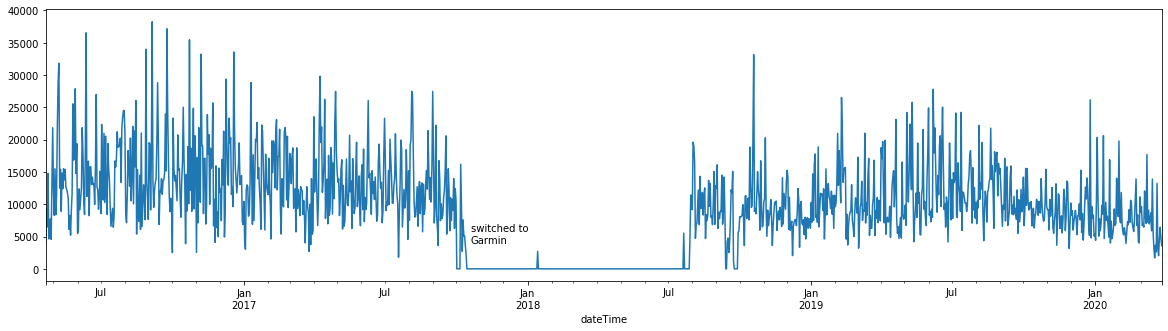

In [5]:
df_day['value'].plot(figsize=(20,5))
plt.text('2017-10-20', 4000, 'switched to\nGarmin');

# heart rate

In [6]:
heart_df = load_data('hea')

loading from pickle
files done!


In [7]:
heart_df.shape

(15620454, 1)

In [8]:
%%time
heart_df['bpm'] = heart_df.value.map(lambda x: x['bpm'])
heart_df['confidence'] = heart_df.value.map(lambda x: x['confidence'])
heart_df.drop(columns=['value'], inplace=True)

CPU times: user 10.9 s, sys: 1.83 s, total: 12.7 s
Wall time: 11.1 s


In [9]:
heart_df

,bpm,confidence
dateTime,,
2016-10-23 05:00:02,73,2
2016-10-23 05:00:04,72,2
2016-10-23 05:00:07,72,2
2016-10-23 05:00:08,73,2
2016-10-23 05:00:11,72,2
...,...,...
2018-07-31 17:57:08,57,2
2018-07-31 17:57:10,58,2
2018-07-31 17:57:13,58,2


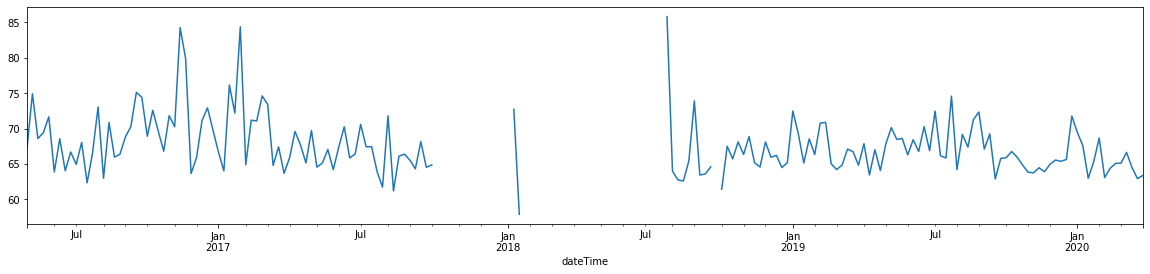

In [11]:
heart_df.bpm.resample('w').mean().plot(figsize=(20,4));

# distance

In [12]:
dist_df = load_data('dis')

loading from pickle
files done!


In [13]:
dist_df.tail()

,value
dateTime,
2018-01-15 01:41:00,0
2018-01-15 13:59:00,0
2018-01-17 01:18:00,0
2018-01-17 15:50:00,940
2018-01-17 15:51:00,0


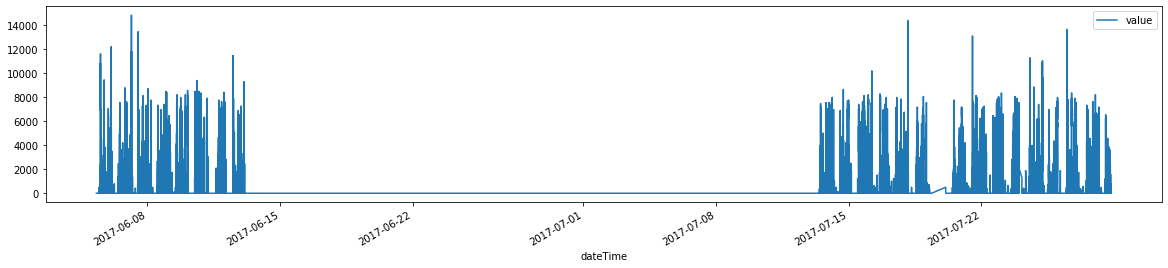

In [14]:
dist_df[75000:100000].plot(figsize=(20,4));

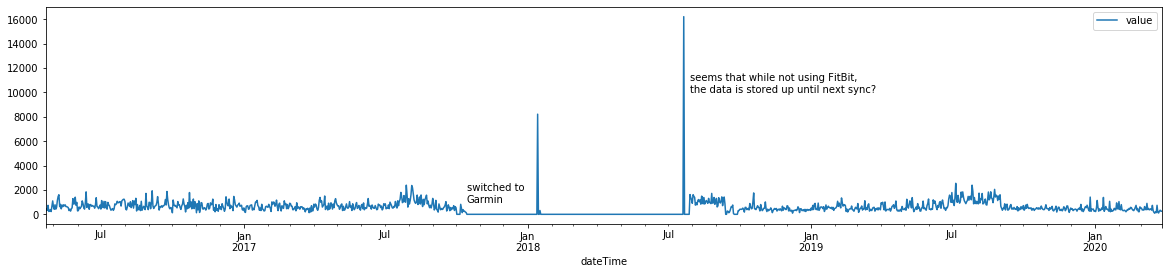

In [15]:
df_day = dist_df.resample('d').mean().fillna(0)
df_day.plot(figsize=(20,4))
plt.text('2017-10-15', 1000, 'switched to\nGarmin')
plt.text('2018-07-29', 10000, 'seems that while not using FitBit,\nthe data is stored up until next sync?');

# sleep

In [16]:
sleep_df = load_data('sle')

loading from pickle
files done!


In [17]:
sleep_df.head(2)

,logId,dateOfSleep,endTime,duration,minutesToFallAsleep,minutesAsleep,minutesAwake,minutesAfterWakeup,timeInBed,efficiency,type,infoCode,levels,mainSleep
startTime,,,,,,,,,,,,,,
2019-12-29 23:27:30,25215002864,2019-12-30,2019-12-30T07:38:00.000,29400000,0,439,51,0,490,51,stages,0,"{'summary': {'deep': {'count': 5, 'minutes': 8...",True
2019-12-27 23:45:30,25177798107,2019-12-28,2019-12-28T07:52:30.000,29220000,0,421,66,0,487,54,stages,0,"{'summary': {'deep': {'count': 6, 'minutes': 8...",True


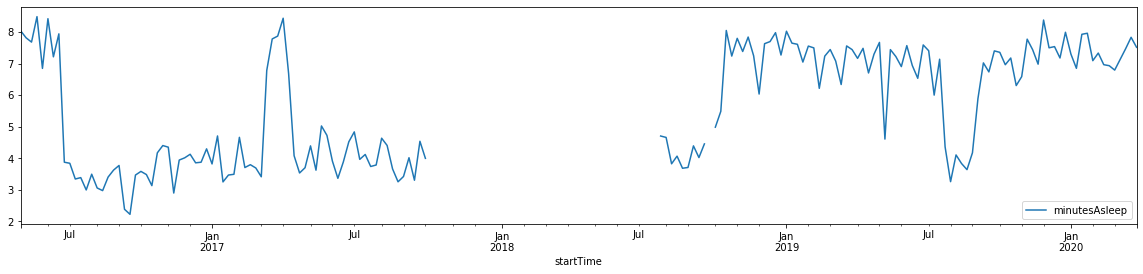

In [18]:
(sleep_df.resample('w').agg({'minutesAsleep':'mean'})/60).plot(figsize=(20,4));

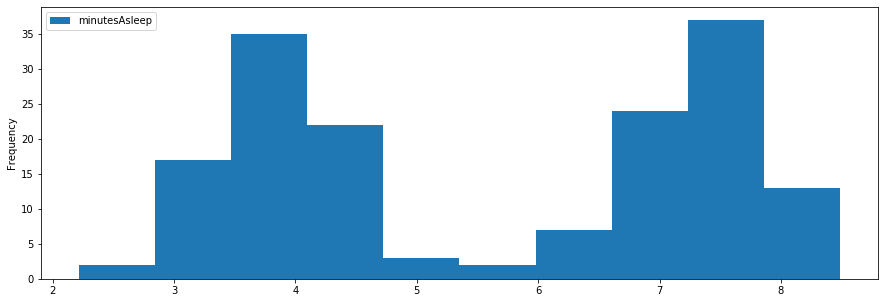

In [19]:
(sleep_df.resample('w').agg({'minutesAsleep':'mean'})/60).plot(kind='hist', figsize=(15,5));

# Estimated Oxygen Variation

In [20]:
oxy_df = load_data('est')

loading from pickle
files done!


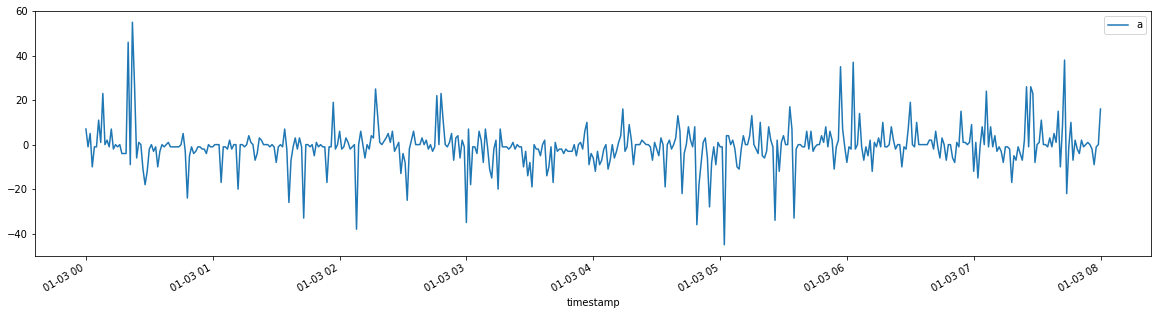

In [22]:
oxy_df.loc['2020-01-03'].plot(figsize=(20,5));